# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [205]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker import plot_maker_3d

## 2. Importing Data

In [206]:
# get all the red ball data
X_rec1 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_08h55m.csv', decimal='.', delimiter=',')
X_rec2 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_08h56m.csv', decimal='.', delimiter=',')
X_rec3 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h16m.csv', decimal='.', delimiter=',')
X_rec4 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h49m.csv', decimal='.', delimiter=',')
X_rec5 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h51m.csv', decimal='.', delimiter=',')
X_rec6 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h52m.csv', decimal='.', delimiter=',')
X_rec7 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h53m.csv', decimal='.', delimiter=',')
X_rec8 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h54m.csv', decimal='.', delimiter=',')
X_rec9 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h55m.csv', decimal='.', delimiter=',')
X_rec10 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h58m.csv', decimal='.', delimiter=',')
X_rec_11 = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_09h59m.csv', decimal='.', delimiter=',')

In [207]:
# get all the positions data
y_rec1 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_08h55m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec2 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_08h56m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec3 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h16m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec4 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h49m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec5 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h51m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec6 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h52m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec7 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h53m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec8 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h54m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec9 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h55m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec10 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h58m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_11 = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_09h59m.csv', decimal='.', delimiter=',').iloc[4:]

In [208]:
(X_rec1.shape, y_rec1.shape), (X_rec2.shape, y_rec2.shape), (X_rec3.shape, y_rec3.shape), (X_rec4.shape, y_rec4.shape), (X_rec5.shape, y_rec5.shape), (X_rec6.shape, y_rec6.shape), (X_rec7.shape, y_rec7.shape), (X_rec8.shape, y_rec8.shape), (X_rec9.shape, y_rec9.shape), (X_rec10.shape, y_rec10.shape), (X_rec_11.shape, y_rec_11.shape)

(((979, 24), (979, 3)),
 ((999, 24), (999, 3)),
 ((999, 24), (999, 3)),
 ((1000, 24), (1000, 3)),
 ((1014, 24), (1014, 3)),
 ((1017, 24), (1017, 3)),
 ((1011, 24), (1011, 3)),
 ((1066, 24), (1066, 3)),
 ((1000, 24), (1000, 3)),
 ((1014, 24), (1014, 3)),
 ((1003, 24), (1003, 3)))

In [209]:
print(f"The amount of NaN in rec1: {X_rec1.isna().sum().sum()}")
print(f"The amount of NaN in rec2: {X_rec2.isna().sum().sum()}")
print(f"The amount of NaN in rec3: {X_rec3.isna().sum().sum()}")
print(f"The amount of NaN in rec4: {X_rec4.isna().sum().sum()}")
print(f"The amount of NaN in rec5: {X_rec5.isna().sum().sum()}")
print(f"The amount of NaN in rec6: {X_rec6.isna().sum().sum()}")
print(f"The amount of NaN in rec7: {X_rec7.isna().sum().sum()}")
print(f"The amount of NaN in rec8: {X_rec8.isna().sum().sum()}")
print(f"The amount of NaN in rec9: {X_rec9.isna().sum().sum()}")
print(f"The amount of NaN in rec10: {X_rec10.isna().sum().sum()}")
print(f"The amount of NaN in rec11: {X_rec_11.isna().sum().sum()}")

The amount of NaN in rec1: 0
The amount of NaN in rec2: 10
The amount of NaN in rec3: 2152
The amount of NaN in rec4: 8
The amount of NaN in rec5: 8320
The amount of NaN in rec6: 8340
The amount of NaN in rec7: 10
The amount of NaN in rec8: 80
The amount of NaN in rec9: 2
The amount of NaN in rec10: 0
The amount of NaN in rec11: 18


Interpolation did not work on rec 3,5,6 so i will just drop the rows that contain NaN values
### 2.3 Combine all the datasets

In [210]:
from utils.interpolation import interpolate_dataframe

X_rec1 = interpolate_dataframe(X_rec1)
X_rec2 = interpolate_dataframe(X_rec2)
X_rec3 = interpolate_dataframe(X_rec3)
X_rec4 = interpolate_dataframe(X_rec4)
X_rec5 = interpolate_dataframe(X_rec5)
X_rec6 = interpolate_dataframe(X_rec6)
X_rec7 = interpolate_dataframe(X_rec7)
X_rec8 = interpolate_dataframe(X_rec8)
X_rec9 = interpolate_dataframe(X_rec9)
X_rec10 = interpolate_dataframe(X_rec10)
X_rec_11 = interpolate_dataframe(X_rec_11)

In [211]:
X_train = pd.concat([X_rec1, X_rec2,X_rec3, X_rec4, X_rec5, X_rec6, X_rec7, X_rec8, X_rec9, X_rec10, X_rec_11])
y_train = pd.concat([y_rec1, y_rec2, y_rec3, y_rec4, y_rec5, y_rec6, y_rec7, y_rec8, y_rec9, y_rec10, y_rec_11])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [212]:
X_train.shape, y_train.shape

((11102, 24), (11102, 3))

In [213]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [214]:
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,...,v8,u9,v9,u10,v10,u11,v11,x,y,z
0,44.5,88.0,70.0,43.0,93.0,44.0,70.0,88.0,45.0,66.0,...,88.0,67.5,88.0,45.0,44.0,67.0,44.0,5.060879,3.275345,23.53188
1,44.5,88.0,69.5,43.5,93.0,44.0,70.0,88.0,44.5,66.0,...,88.5,67.5,88.0,45.0,44.0,67.5,43.5,5.121644,3.242697,23.49597
2,44.5,88.0,69.5,43.5,93.0,43.5,70.0,88.0,44.5,66.0,...,88.5,67.5,88.0,45.0,44.0,67.5,43.5,5.191598,3.212499,23.46275
3,44.5,88.0,69.5,43.5,92.5,43.5,70.0,88.0,44.5,66.0,...,88.0,67.0,88.0,44.0,44.0,66.0,43.0,5.270519,3.185183,23.43270
4,44.0,88.0,69.0,43.0,92.0,43.0,69.0,88.0,44.5,65.5,...,88.0,67.0,88.0,43.5,43.5,66.0,43.0,5.358130,3.161166,23.40628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11097,50.5,79.5,76.0,35.0,100.0,34.0,77.0,80.0,51.0,57.0,...,79.0,74.0,79.5,50.0,34.0,73.0,34.0,4.709852,1.550914,20.71198
11098,50.0,78.0,75.0,32.0,78.5,78.0,76.0,79.0,50.0,56.0,...,78.0,73.0,79.0,49.0,33.0,72.5,32.0,4.832434,1.392934,20.95013
11099,49.0,77.0,74.0,31.0,78.0,77.5,74.0,77.0,49.0,54.5,...,77.0,71.0,77.0,48.0,32.0,71.0,31.0,4.965268,1.243471,21.29272
11100,45.5,74.5,71.0,30.0,94.0,30.0,71.5,74.5,45.5,52.5,...,75.0,69.0,75.0,46.0,30.0,68.0,30.0,5.107763,1.103189,21.72610


In [215]:
# check for missing values
print(f'The data has missing values: {combined.isna().sum().sum()}')
# drop all rows that have more than 3 NaN values
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isna().sum().sum()}')

The data has missing values: 0
The data has missing values: 0


In [216]:
X = combined.iloc[:, :24]
y = combined.iloc[:, 24:]

In [217]:
X.shape, y.shape

((11102, 24), (11102, 3))

In [218]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [219]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [220]:
# Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 28000, 'mlp__learning_rate_init': 0.01, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
model = MLPRegressor(random_state=42, max_iter=28000, learning_rate_init=0.01, learning_rate='adaptive', hidden_layer_sizes=(50, 100, 50), early_stopping=True, alpha=0.001, activation='relu')

param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50) # ,(100,), (64, 32, 64)],
         ],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

#random_search.fit(X_scaled, y_scaled)

In [221]:
#print(f'Best parameters: {random_search.best_params_}')
#print(f'Best score: {random_search.best_score_}')

In [222]:
#model = random_search.best_estimator_

## 5. Training the Model

In [223]:
model.fit(X_scaled, y_scaled)

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 100, 50),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=28000,
             random_state=42)

## 6. Make Predictions On Test Data

In [224]:
import pandas as pd

In [225]:
X_test_8_a = pd.read_csv('../data-12-cams/red_ball_coordinates_128px_2024-03-20_08h51m.csv', decimal='.', delimiter=',')
y_test_8_a = pd.read_csv('../data-12-cams/positions_xyz_2024-03-20_08h51m.csv', decimal='.', delimiter=',').iloc[4:]

In [226]:
(X_test_8_a.shape, y_test_8_a.shape)

((974, 24), (974, 3))

In [227]:
combo_test_a = pd.concat([X_test_8_a, y_test_8_a], axis=1)

In [228]:
#combo_test_a.dropna(inplace=True, thresh=31)
#combo_test_b.dropna(inplace=True, thresh=31)

In [229]:
from utils.interpolation import interpolate_dataframe

#X_test_8_a = interpolate_dataframe(X_test_8_a)

In [230]:
(X_test_8_a.shape, y_test_8_a.shape)

((974, 24), (974, 3))

In [231]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :24]
    y_val = combined_test.iloc[:, 24:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [232]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

In [233]:
X_test_8_scaled_a, y_test_8_a = prepare_and_scale_test_data(X_test_8_a, y_test_8_a, scaler_x)
X_test_8_scaled_a.shape

(965, 24)

Mean Squared Error on Test Data Set: 0.25688831436905013
Mean Absolute Error on Test Data Set: 0.4180489782085712
R2 Score on Test Data set: 0.8165548290904049


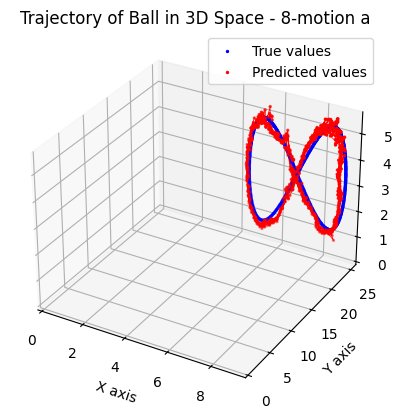

In [234]:
X_test_8_pred_a, mse_8_a, mae_8_a, r2_8_a = predict_evaluate_plot(X_test_8_scaled_a, y_test_8_a, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion a')